<a href="https://colab.research.google.com/github/GcRezende/dados_California/blob/main/analiseCalifornia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
dados = pd.read_csv("housing.csv")

In [14]:
dados["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

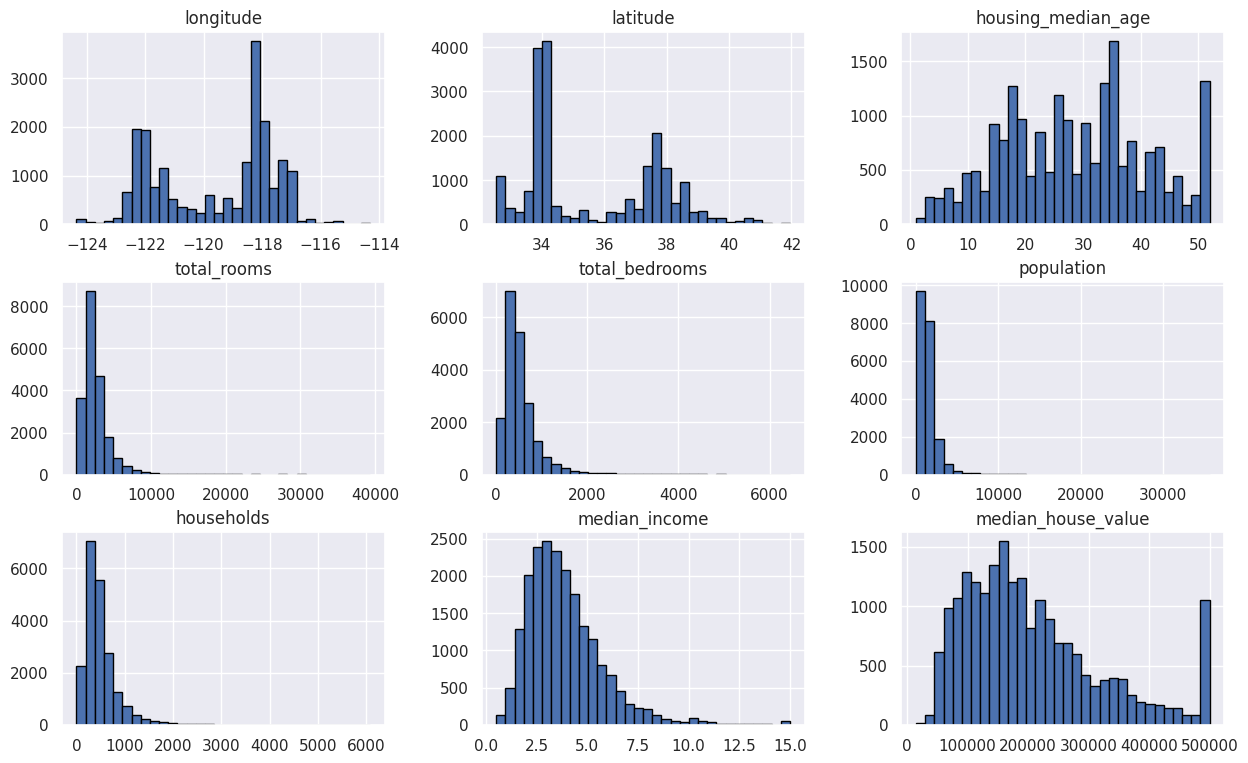

In [16]:
dados.hist(figsize=(15,9), bins=32, edgecolor="black")

<Axes: xlabel='latitude', ylabel='longitude'>

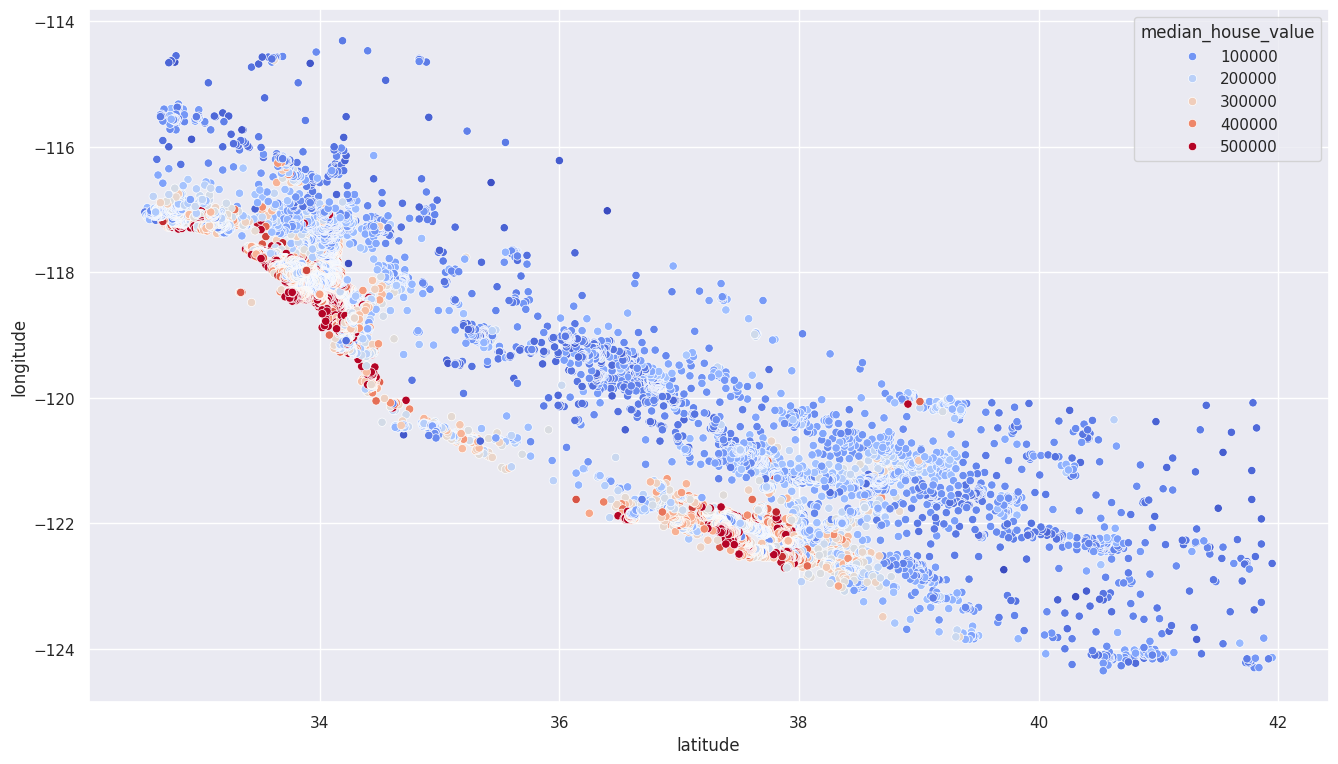

In [17]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data = dados, hue="median_house_value", palette="coolwarm")

In [18]:
dados = dados.dropna()

In [40]:
dummies = pd.get_dummies(dados["ocean_proximity"],dtype=int)
dados = dados.drop("ocean_proximity", axis=1)

In [41]:
dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<Axes: >

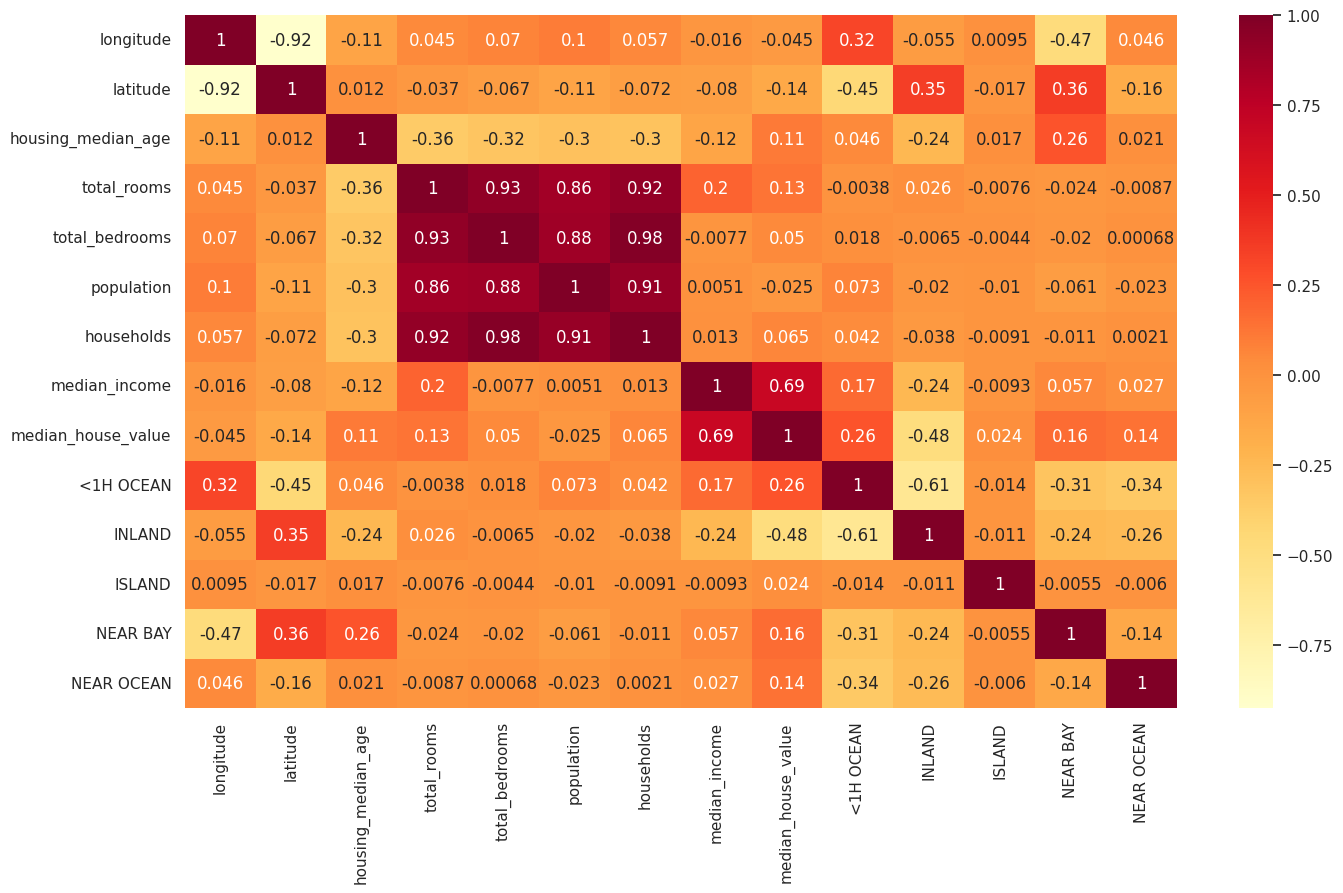

In [43]:
sb.set(rc={'figure.figsize':(16,9)})

sb.heatmap(dados.corr(),annot=True, cmap="YlOrRd")

In [45]:
dados.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

In [55]:
dados_l = dados.drop(dados[dados['median_house_value'] >= 495000].index)
dados_l

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [56]:
dados_l.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.645797
<1H OCEAN             0.288515
NEAR BAY              0.157256
total_rooms           0.144200
NEAR OCEAN            0.132433
households            0.095319
total_bedrooms        0.075776
housing_median_age    0.065543
ISLAND                0.031321
population            0.013814
longitude            -0.045712
latitude             -0.149510
INLAND               -0.500173
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

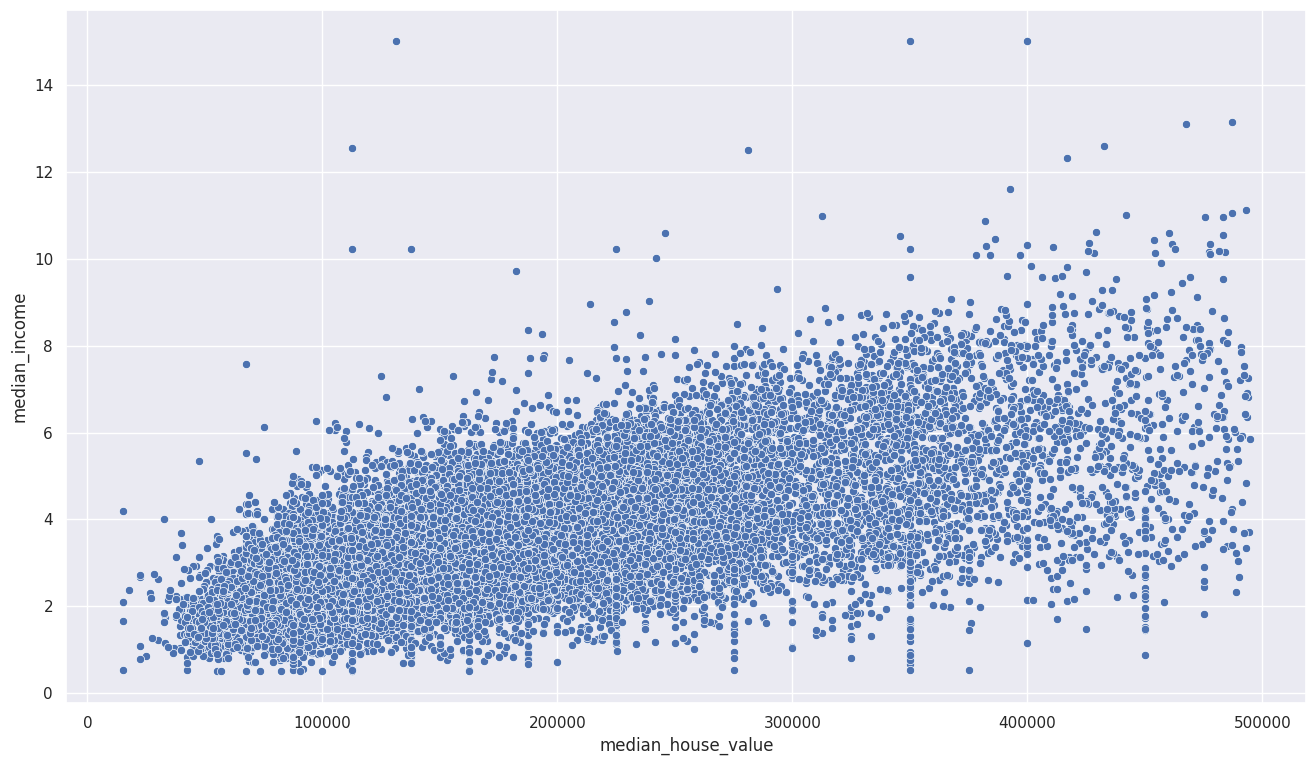

In [57]:
sb.scatterplot(x=dados_l['median_house_value'], y = dados_l['median_income'])

<Axes: >

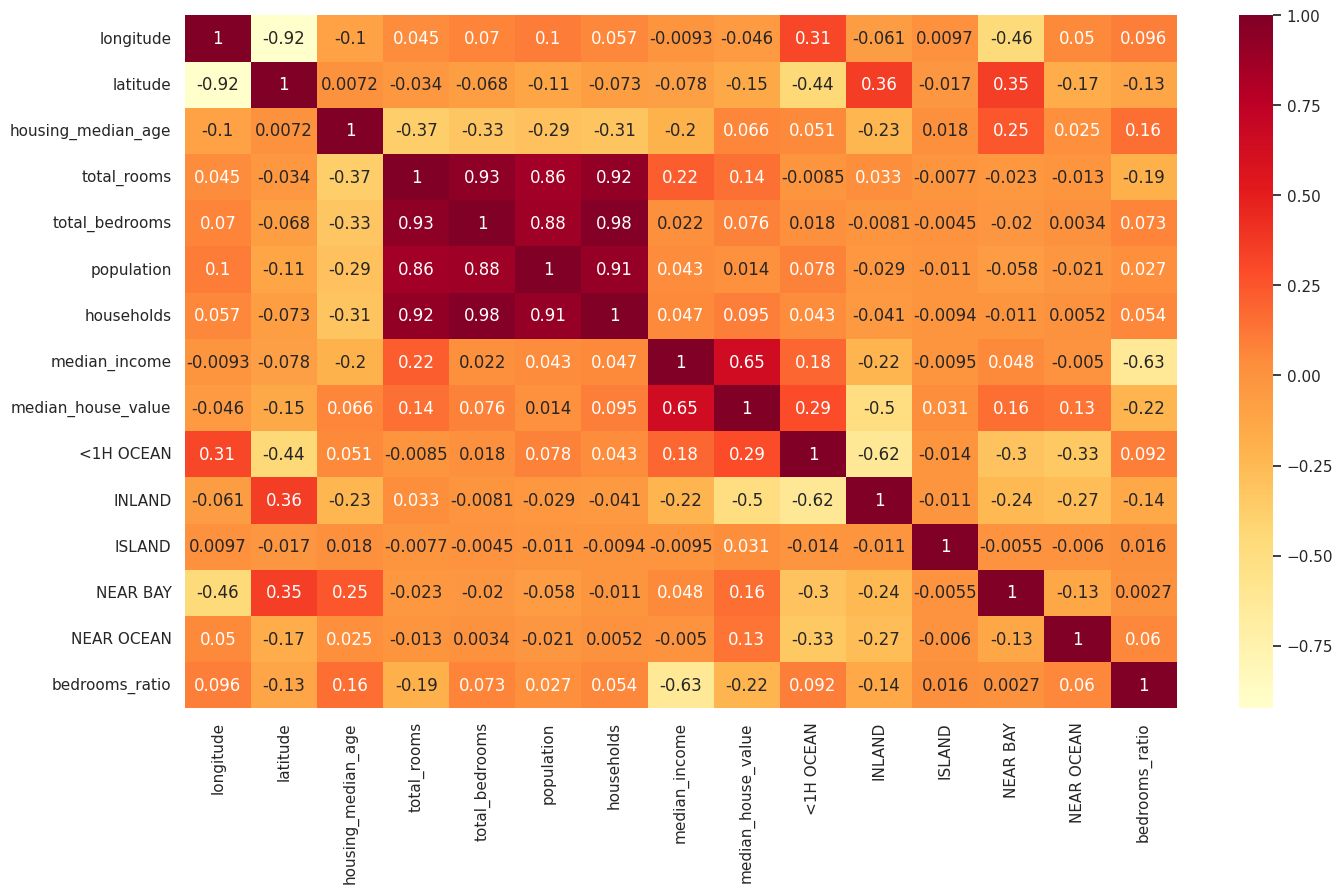

In [61]:
dados_l['bedrooms_ratio'] = dados_l['total_bedrooms']/dados_l['total_rooms']
sb.heatmap(dados_l.corr(),annot=True, cmap="YlOrRd")

In [63]:
x= dados_l.drop(["median_house_value"],axis=1)
y= dados_l['median_house_value']

In [66]:
from sklearn.model_selection import train_test_split
x_tre, x_pro, y_tre, y_pro = train_test_split(x,y, test_size=.25)

In [68]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()

In [69]:
modelo.fit(x_tre,y_tre)


LinearRegression()

In [71]:
pred= modelo.predict(x_pro)
comp ={"predict":pred, "Valor":y_pro}
pd.DataFrame(comp)

,predict,Valor
7680,210101.398358,171600.0
9899,122429.361673,325000.0
438,201886.447208,140600.0
13261,186758.616471,155700.0
2098,78530.015358,56000.0
...,...,...
8067,281497.660087,321800.0
206,154843.494660,106300.0
19774,68467.912402,86400.0
4141,199919.100705,198000.0


In [72]:
print(modelo.score(x_tre, y_tre))
print(modelo.score(x_pro, y_pro))

0.6274329585444358
0.6070122052319802


In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_pro, pred)

In [78]:
rmse = np.sqrt(mse)
rmse

59470.88536097772

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_tre_s = scaler.fit_transform(x_tre)
x_pro_s = scaler.fit_transform(x_pro)


In [80]:
modelo_s = LinearRegression()

In [82]:
modelo_s.fit(x_tre_s,y_tre)

LinearRegression()

In [86]:
pred_s= modelo_s.predict(x_pro_s)
comp_s ={"predict":pred_s, "Valor":y_pro}
pd.DataFrame(comp)

,predict,Valor
7680,210101.398358,171600.0
9899,122429.361673,325000.0
438,201886.447208,140600.0
13261,186758.616471,155700.0
2098,78530.015358,56000.0
...,...,...
8067,281497.660087,321800.0
206,154843.494660,106300.0
19774,68467.912402,86400.0
4141,199919.100705,198000.0


In [87]:
print(modelo_s.score(x_tre_s, y_tre))
print(modelo_s.score(x_pro_s, y_pro))

0.6274329585444358
0.6102200555512503


In [88]:
mse_s = mean_squared_error(y_pro, pred_s)
rmse_s = np.sqrt(mse_s)
rmse_s

59227.6658432361